# CyberGIS-Compute: Geospatial Middleware for High-Performance Computing

**Notebook Author:** Alexander Michels

This is a short example notebook designed to demo the CyberGIS-Compute Python SDK UI with the Hello World notebook. We will walk through running a simple job and examine how that works.

## Using the CyberGIS-Compute SDK

CyberGIS-Compute has a Software Development Kit (SDK) that allows users to interact with it. It is a [Python package in PyPi](https://pypi.org/project/cybergis-compute-client/) and can be installed on any computer with:

> pip install cybergis-compute-client

However, note that the SDK doesn't quite work everywhere because CyberGIS-Compute relies on authenication from JupyterHubs to ensure that unknown actors can't waste HPC resources. For now, always use CyberGIS-Compute from [CyberGISX](https://cybergisx.cigi.illinois.edu/), [CyberGIS-Jupyter for Water (CJW)](https://go.illinois.edu/cybergis-jupyter-water/), or the [I-GUIDE JupyterHub](jupyter.iguide.illinois.edu).

To use the SDK, we first import the package:

In [1]:
from cybergis_compute_client import CyberGISCompute

Then we want to establish a connection to the CyberGIS-Compute Core server that will submit our workflow to the High-Performance Computing (HPC) system. To do this with our SDK, you want to run the line below:

In [2]:
cybergis = CyberGISCompute(url="cgjobsup.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")

This establishes a connection to our Core server at `cgjobsup.cigi.illinois.edu`. You can open that link the browser to see it [https://cgjobsup.cigi.illinois.edu](https://cgjobsup.cigi.illinois.edu). You should see `{"message":"Hello World from Compute-V1"}`.

Let's examine the rest of the stuff in the command we just ran:

* `isJupyter=True`, tells the SDK we are using it from a Jupyter interface which is important for "logging you in" to the Core
* `protocol="HTTPS"`, tells us what [protocol](https://en.wikipedia.org/wiki/HTTPS) to use when talking to the Core
* `port=443`, tells us what [port](https://en.wikipedia.org/wiki/Port_(computer_networking)) to use when talking to the Core (think of this as making sure we are on the same walkie-talkie channel)
* `suffix="v2"`, is needed because there is a version 1 of Compute that we still support for a few applications, but all new development should be on version 2. We access version 2 by adding "/v2" to the to the server address: [https://cgjobsup.cigi.illinois.edu/v2/](https://cgjobsup.cigi.illinois.edu/v2/).

Now that we are connected, we can show the User Interface (UI) for Compute. When you run the cell below you should see an interface like this:

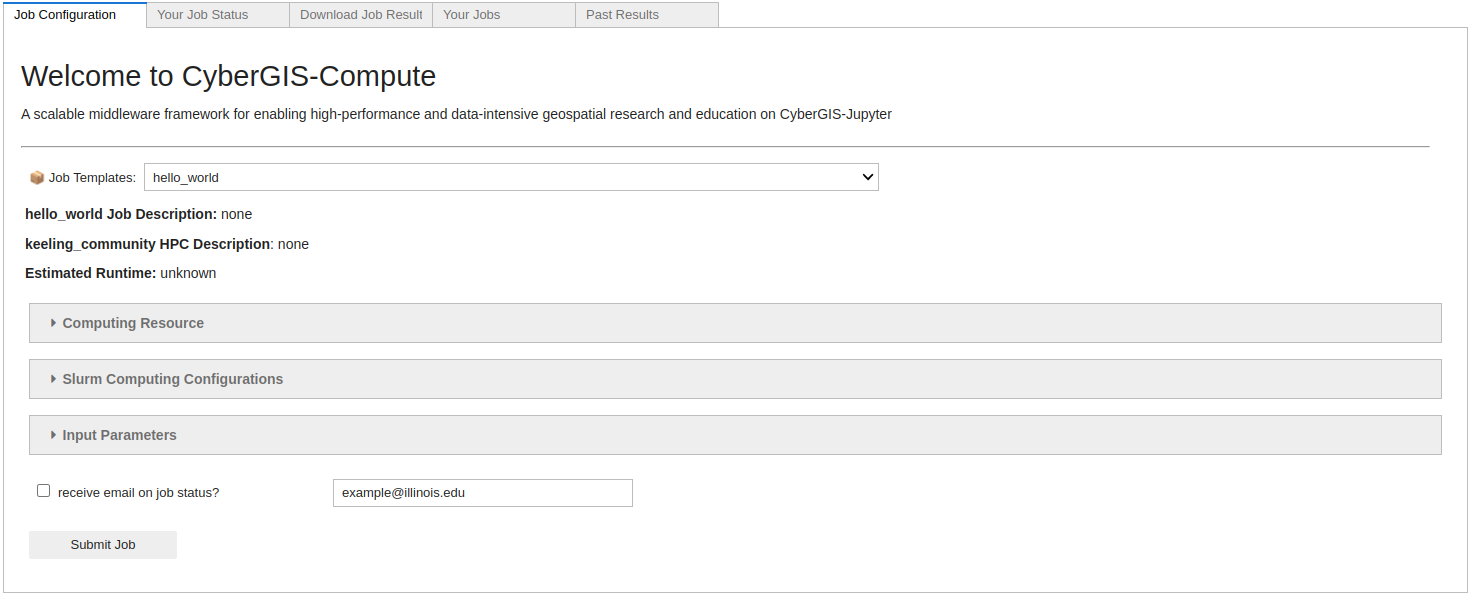

For this simple test, we are just going to run the "hello_world" job to practice submitting jobs. All you need to do is click "Submit Job."

In [3]:
cybergis.show_ui()

When the job begins running, you should see the UI switch tabs to "Your Job Status" and you should see "✌️ Your Job is Here!" at the top. Compute goes through the various stages of executing your job (registering it with the HPC, uploading the code, submitting the job, and waiting for results) and when it ends you will see a snippet of the job logs at the bottom.

Congratulations, you have run your first CyberGIS-Compute job! 


## Quick Look at a CyberGIS-Compute Model.

You might ask, how did CyberGIS-Compute do it? 

Well the job is registered with CyberGIS-Compute along with the Github repository. We can get info on the jobs registered with the Core server with:

In [4]:
cybergis.list_git()

| link | name | container | repository | commit | 
| --- | --- | --- | --- | --- | 
| git://wrfhydro-5.x | WRFHydro | wrfhydro-5.x | https://github.com/cybergis/cybergis-compute-v2-wrfhydro.git | NONE | 
| git://three-examples | three-examples | cybergisx-0.4 | https://github.com/alexandermichels/cybergis-compute-examples.git | NONE | 
| git://summa3 | SUMMA | summa-3.0.3 | https://github.com/cybergis/cybergis-compute-v2-summa.git | NONE | 
| git://Subset_AORC_Forcing_Data_Processor | SubsetAORCForcing Data Processor | subsetaorcforcingdata-processor | https://github.com/I-GUIDE/cybergis-compute-subsetaorcforcingdata-processor.git | NONE | 
| git://pysal-access | Pysal Access Example | cybergisx-0.4 | https://github.com/cybergis/pysal-access-compute-example.git | NONE | 
| git://mpi-test | MPI Hello World | mpich | https://github.com/cybergis/cybergis-compute-mpi-helloworld.git | NONE | 
| git://hello_world | hello world | python | https://github.com/cybergis/cybergis-compute-hello-world.git | NONE | 
| git://Extract_Inundation_Census_Tracts_Processor | ExtractInundationCensusTracts Data Processor | extractinundationcensustracts-processor | https://github.com/I-GUIDE/cybergis-compute-extractinundationcensustracts-processor.git | NONE | 
| git://ERA5_Connector | ERA5 Data Connector | era5input-connector | https://github.com/I-GUIDE/cybergis-compute-era5input-connector.git | NONE | 
| git://data_fusion | data fusion | datafusion | https://github.com/cybergis/data_fusion.git | NONE | 
| git://Dam_Flood_Inundation_Map_Connector | Dam Flood Inundation Map Connector | damfiminput-connector | https://github.com/I-GUIDE/cybergis-compute-damfiminput-connector.git | NONE | 
| git://CUAHSI_Subsetter_Connector | CUAHSISubsetterInput Data Connector | cuahsisubsetterinput-connector | https://github.com/I-GUIDE/cybergis-compute-cuahsisubsetterinput-connector.git | NONE | 
| git://covid-access | COVID-19 spatial accessibility | cybergisx-0.4 | https://github.com/cybergis/cybergis-compute-spatial-access-covid-19.git | NONE | 
| git://24hour-healthcare-access-NYC | NYC Primary Care Accessibility | cybergisx-0.4 | https://github.com/cybergis/sequence_in_access.git | NONE | 

The "hello world" job is associated with this Github repository: [https://github.com/cybergis/cybergis-compute-hello-world](https://github.com/cybergis/cybergis-compute-hello-world).

If you were to open the link (feel free to check it out, then come back) the main file to look at is our `manifest.json`. This is the "instruction manual" that a model developer gives to CyberGIS-Compute so that we know how to run the model. The manifest for this model is a bit complex, but we will break each part down:

```
{
    "name": "hello world",
    "container": "python",
    "pre_processing_stage": "python setup.py",
    "execution_stage": "bash main.sh",
    "post_processing_stage": "python cleanup.py",
    "slurm_input_rules": {
        "time": {
            "max": 50,
            "min": 10,
            "default_value": 10,
            "step": 1,
            "unit": "Minutes"
        },
        "num_of_task": {
            "max": 6,
            "min": 1,
            "default_value": 2,
            "step": 1
        }
    },
    "require_upload_data": false,
    "param_rules": {
        "input_a": {
            "type": "integer",
            "require": true,
            "max": 100,
            "min": 0,
            "default_value": 50,
            "step": 10
        },
        "input_b": {
            "type": "string_option",
            "options": ["foo", "bar"],
            "default_value": "foo"
        }
    },
    "default_result_folder_downloadable_path": "/demo_quick_start_0",
    "supported_hpc": ["anvil_community", "expanse_community", "keeling_community"],
    "default_hpc": "keeling_community"
}
```

Breaking this line-by-line:

* `"name": "hello world"` - name of model
* `"container": "python"` - the container to run your code in. Think of this as a pre-built environment with software for now.
* `"pre_processing_stage": "python setup.py"` - the first (or pre-processing) step of your model is to run this `setup.py` file
* `"execution_stage": "bash main.sh"` - the second (or main) step of your model is the run this Bash script
* `"post_processing_stage": "python cleanup.py"` - the third (or post-processing) step of your model is run this python script.
* `"slurm_input_rules": { ... }` - helps us tell the HPC what computing resources you'll need
* `"require_upload_data": false` - we aren't requiring the user to upload any data (but you can if your model requires a certain kind of data)
* `"param_rules": { ... }` - allows you to define parameters for you model and create widgets in the interface to enter them
* `"default_result_folder_downloadable_path": "/demo_quick_start_0"` - this is the default path to download when downloading results
* `"supported_hpc": ["anvil_community", "expanse_community", "keeling_community"]` - a list of HPC resources you can run the model on
* `"default_hpc": "keeling_community"` - the default HPC to run on

We will talk more about the manifest with our next hands-on session and more information [can be found in the CyberGIS-Compute documentation](https://cybergis.github.io/cybergis-compute-python-sdk/model_contribution/develop_model.html#advanced-topic-manifest-options).